# DATA EXPLORATION - PNT2022TMID09615

<!--                    Visualizing and Predicting Heart Diseases with an Interactive Dashboard
                                      Heart Disease Prediction using Machine Learning Approach
Heart disease is a general term that includes many types of heart problems. It's also called cardiovascular disease, which means heart and blood vessel disease.

Heart disease is the leading cause of death in the United States, but there are ways to prevent and manage many types of heart disease when caught early.

Dataset used: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction -->

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.columns.values

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

In [7]:
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

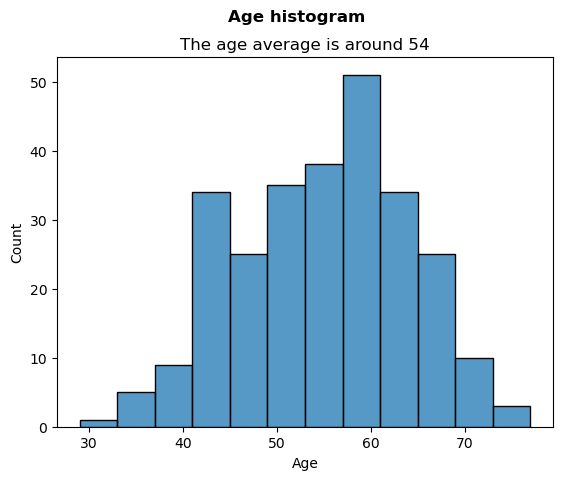

In [8]:
plt.suptitle('Age histogram', fontweight='heavy')
plt.title('The age average is around 54')
sns.histplot(data=df, x='Age')
plt.show()

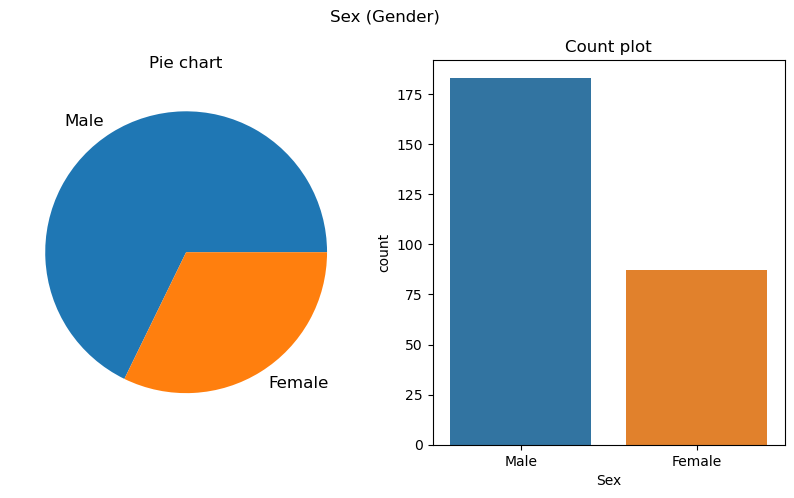

1    183
0     87
Name: Sex, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [9]:
labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Sex'].value_counts(), labels=labels, textprops={'fontsize':12})

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(df['Sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")

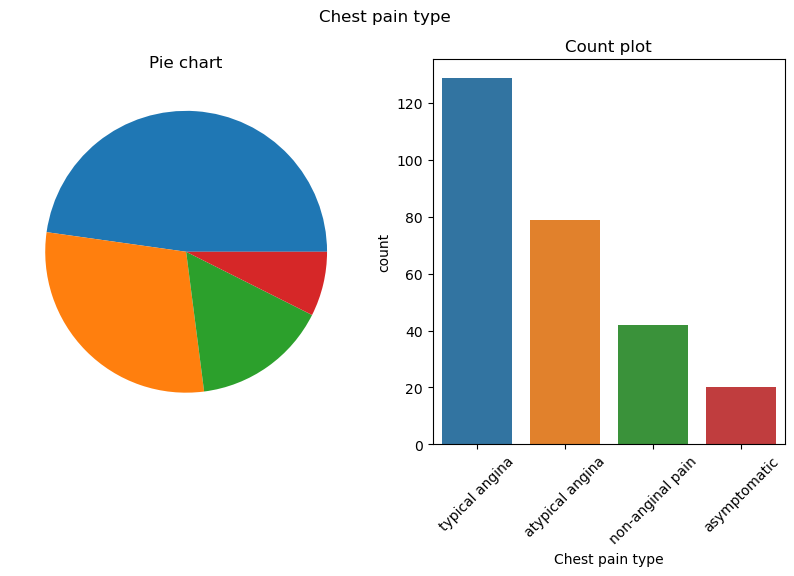

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [10]:
labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
order = df['Chest pain type'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Chest pain type'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Chest pain type', data=df, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)

plt.show()

df['Chest pain type'].value_counts()

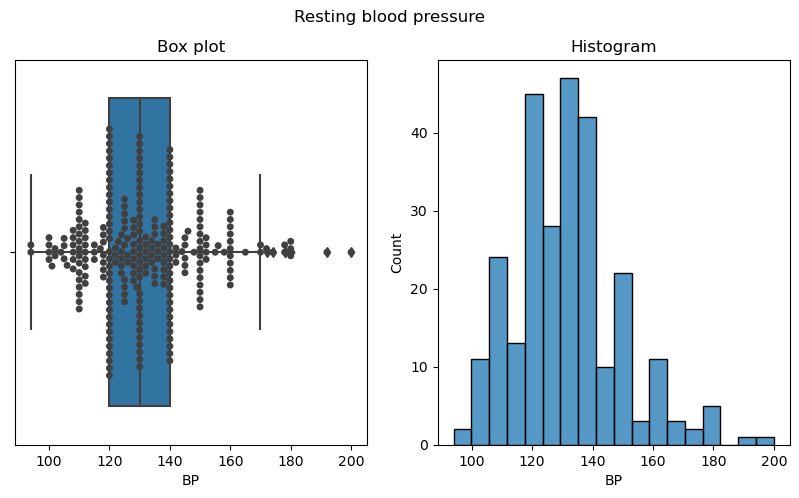

The average resting heart rate: 131.34 It can be observed that histogram is skewed to right side


In [11]:
plt.figure(figsize=(10,5))
plt.suptitle("Resting blood pressure")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="BP", data=df)
sns.swarmplot(x="BP", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='BP', data=df)
plt.show()

print("The average resting heart rate: %2.2f It can be observed that histogram is skewed to right side" % (df["BP"].mean()))

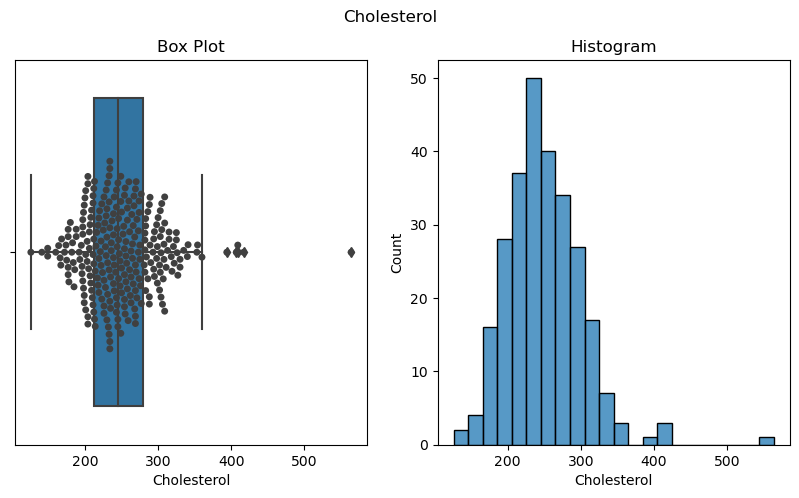

The average resting heart rate: 249.66. The shape of histogram resamble a normal distribution


In [12]:
plt.figure(figsize=(10,5))
plt.suptitle("Cholesterol")

plt.subplot(1,2,1)
plt.title('Box Plot')
sns.boxplot(x="Cholesterol", data=df)
sns.swarmplot(x="Cholesterol", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Cholesterol', data=df)
plt.show()

print("The average resting heart rate: %2.2f. The shape of histogram resamble a normal distribution" % (df["Cholesterol"].mean()))

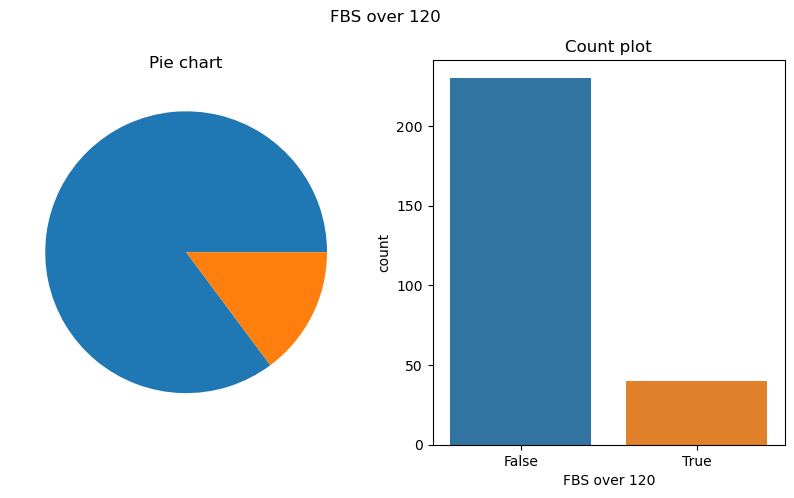

0    230
1     40
Name: FBS over 120, dtype: int64

In [13]:
labels = ["False", 'True']
order = df['FBS over 120'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("FBS over 120")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['FBS over 120'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='FBS over 120', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

df['FBS over 120'].value_counts()

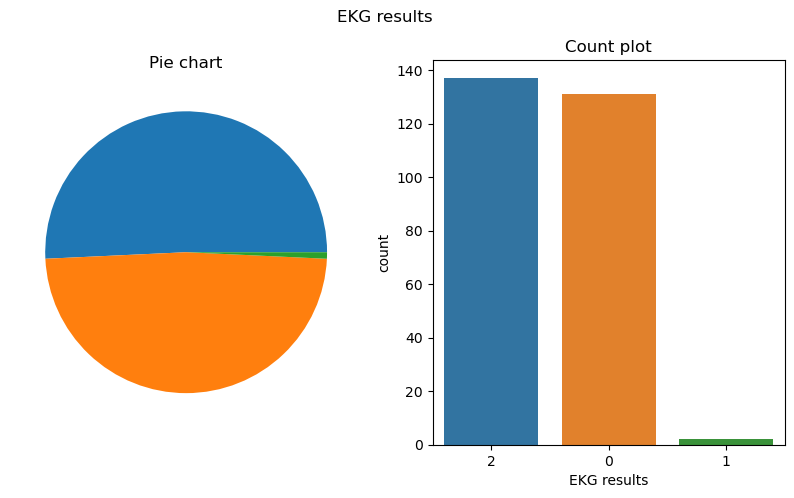

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [14]:
labels = ["normal", 'aving ST-T wave abnormality', "showing probable or definite left ventricular hypertrophy by Estes' criteria"]
order = df['EKG results'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("EKG results")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['EKG results'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='EKG results', data=df, order=order)
#plt.xticks([0,1,2], labels=labels, rotation=45)

plt.show()

df['EKG results'].value_counts()

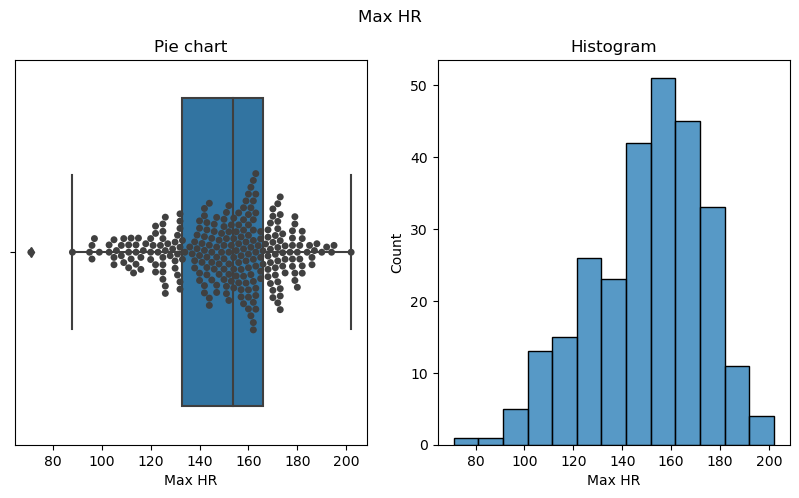

The max heart rate: 149.68 The histogram is slightly left skewed


In [15]:
plt.figure(figsize=(10,5))
plt.suptitle("Max HR")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Max HR", data=df)
sns.swarmplot(x="Max HR", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Max HR', data=df)
plt.show()

print("The max heart rate: %2.2f The histogram is slightly left skewed" % (df["Max HR"].mean()))

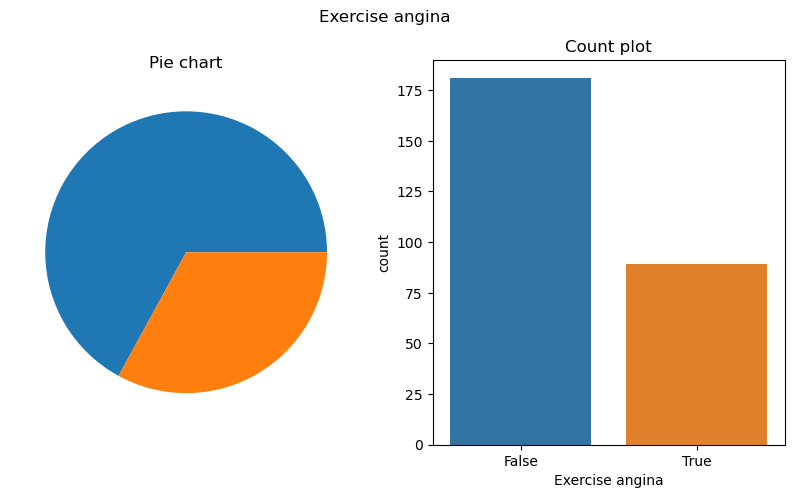

0    181
1     89
Name: Exercise angina, dtype: int64

In [16]:
labels = ["False", 'True']
order = df['Exercise angina'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Exercise angina")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Exercise angina'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Exercise angina', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

df['Exercise angina'].value_counts()

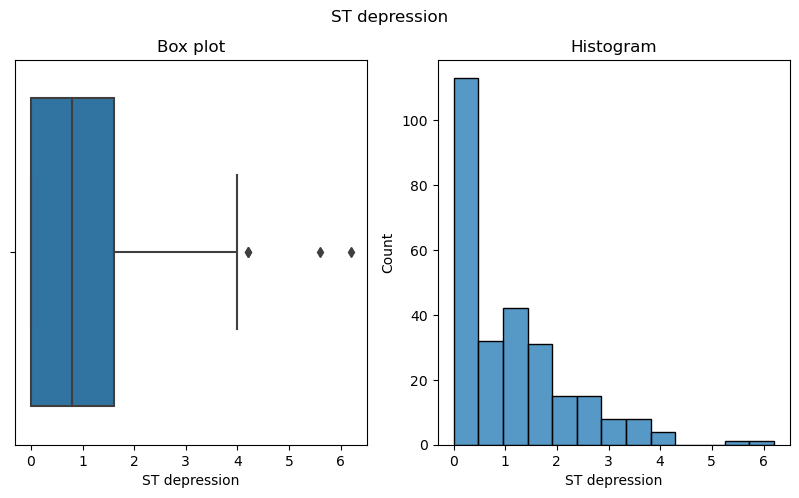

The ST depression average: 1.05 The histogram is left skewed


In [17]:
plt.figure(figsize=(10,5))
plt.suptitle("ST depression")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="ST depression", data=df)

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='ST depression', data=df)
plt.show()

print("The ST depression average: %2.2f The histogram is left skewed" % (df["ST depression"].mean()))

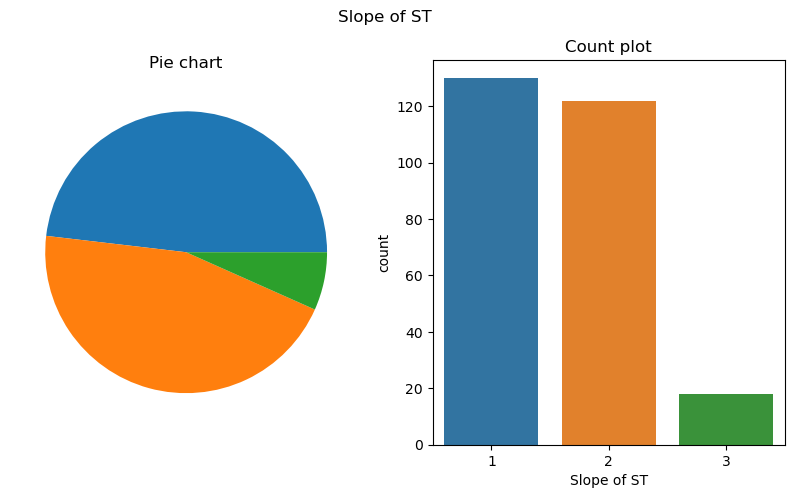

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [18]:
labels = ["1", '2', '3']
order = df['Slope of ST'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Slope of ST")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Slope of ST'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Slope of ST', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Slope of ST'].value_counts()

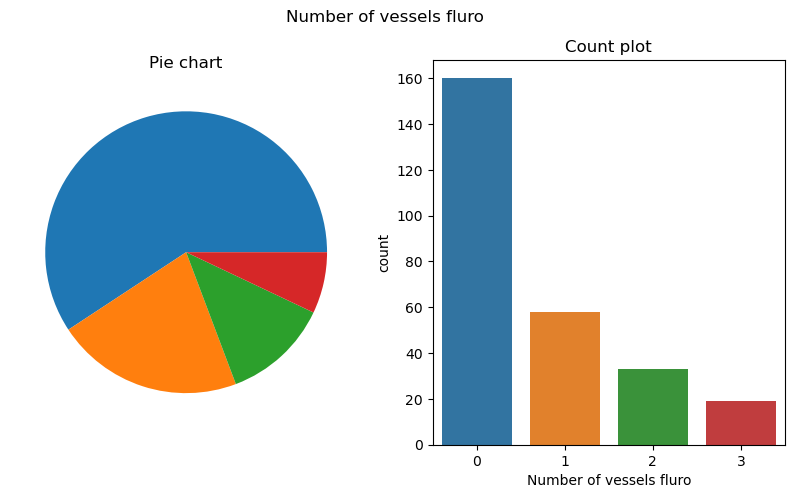

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [19]:
labels = ["0", '1', '2', "3"]
order = df['Number of vessels fluro'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Number of vessels fluro")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Number of vessels fluro'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Number of vessels fluro', data=df, order=order)
plt.xticks([0,1,2,3], labels=labels)

plt.show()

df['Number of vessels fluro'].value_counts()

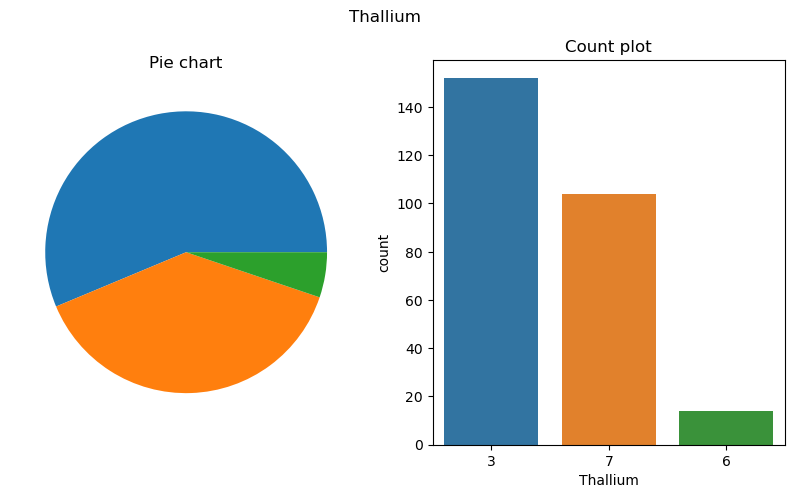

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [20]:
labels = ["3", '7', '6']
order = df['Thallium'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Thallium")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Thallium'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Thallium', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Thallium'].value_counts()

# EDA - Exploratory Data Analysis - PNT2022TMID09615
<!-- Converting object targets to boolean -->

In [21]:
target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

In [22]:
# Correlation matrix - The 'Slope of ST' is highly linearly correlated with 'ST depression'

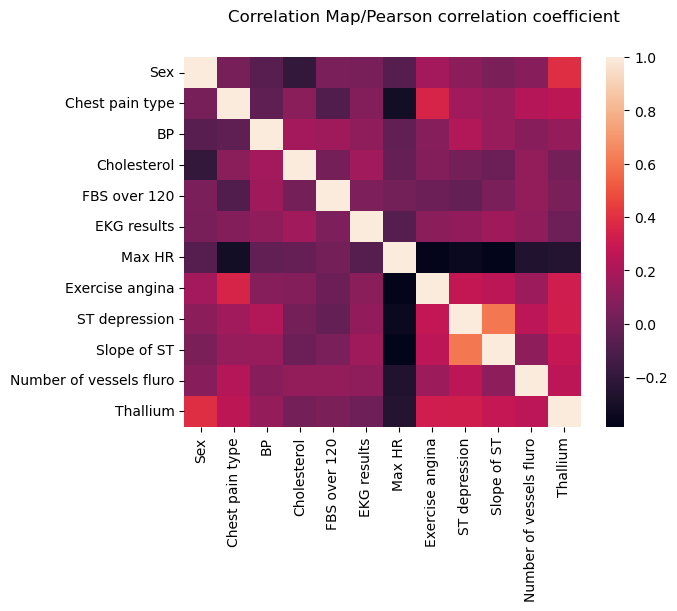

In [23]:
plt.suptitle("Correlation Map/Pearson correlation coefficient")
sns.heatmap(df.iloc[:,1:-1].corr())

plt.show()

In [ ]:
# Age Analysis

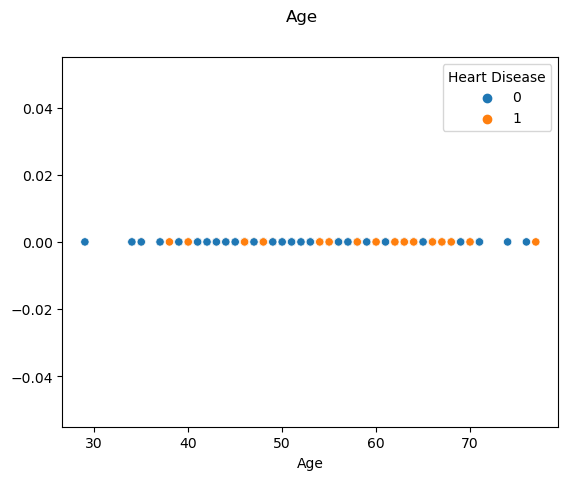

In [24]:
plt.suptitle("Age")
sns.scatterplot(data=df, x='Age', y=np.zeros(len(df['Age'])), hue=target)
plt.show()

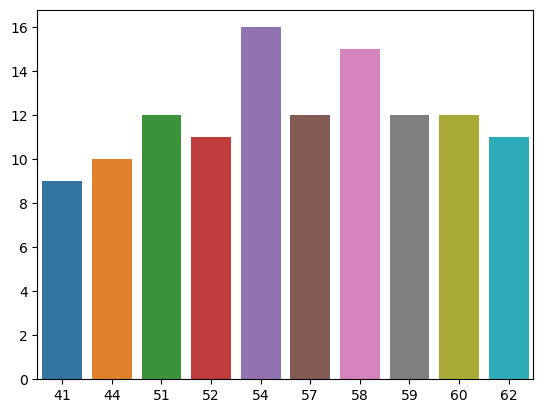

In [25]:
data=df
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.show()

In [26]:
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43333333333333


In [ ]:
# Dividing the Age feature into three parts - "Young", "Middle" and "Elder"

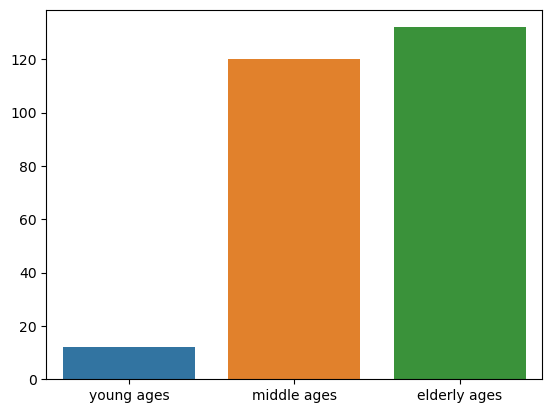

In [27]:
Young = data[(data.Age>=29)&(data.Age<40)]
Middle = data[(data.Age>=40)&(data.Age<55)]
Elder = data[(data.Age>55)]


sns.set_context(font_scale = 1)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.show()

In [ ]:
# A large proportion of dataset contains Elder people.

# Elderly people are more likely to suffer from heart disease.

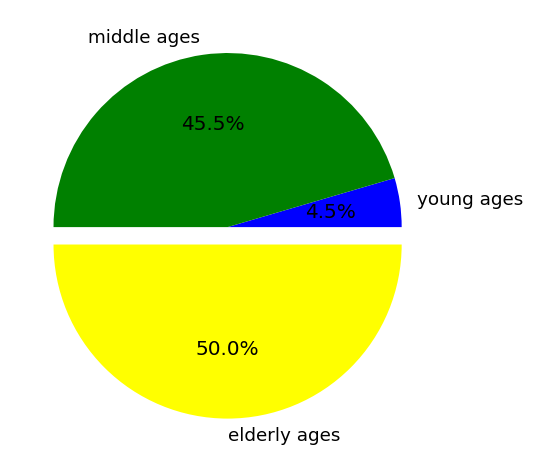

In [28]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]

sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

C:\Users\91904\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91904\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


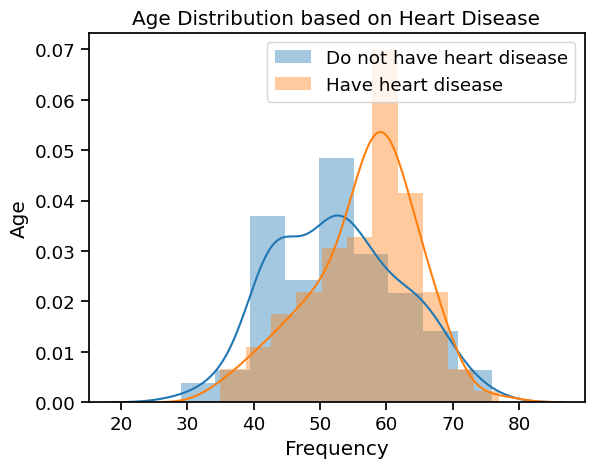

In [29]:
# Display age distribution based on heart disease
sns.distplot(data[data['Heart Disease'] == 'Absence']['Age'], label='Do not have heart disease')
sns.distplot(data[data['Heart Disease'] == 'Presence']['Age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [ ]:
# *Sex Feature Analysis*

sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['Sex'])
plt.show()

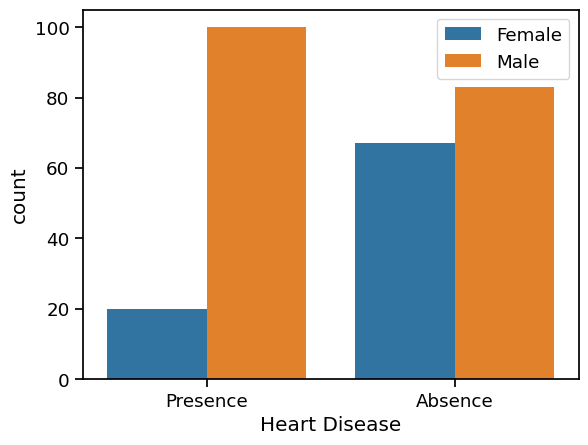

In [30]:
ax = sns.countplot(x='Heart Disease', hue='Sex', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()

C:\Users\91904\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


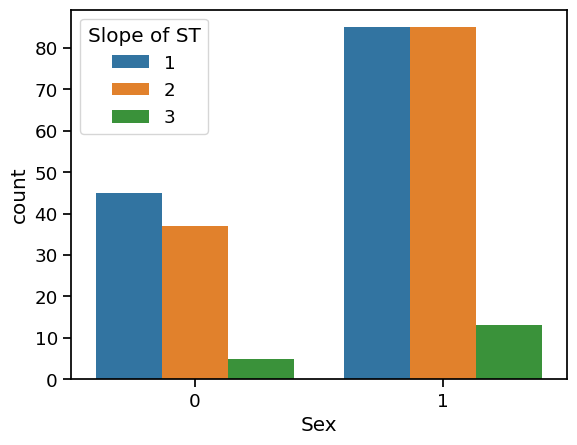

In [31]:
sns.countplot(data['Sex'],hue=data["Slope of ST"])
plt.show()

In [ ]:
# *Chest Pain Type Analysis*

C:\Users\91904\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


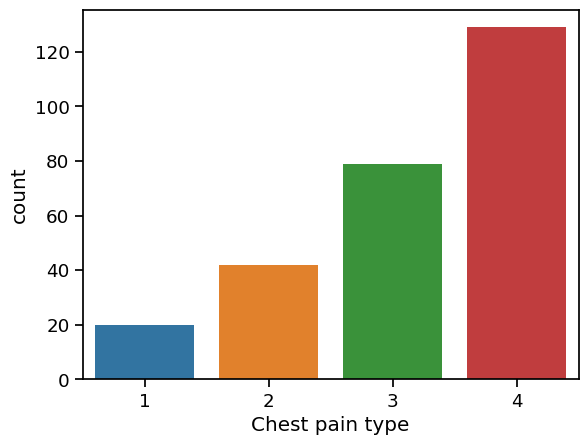

In [32]:
sns.countplot(data['Chest pain type'])
plt.show()

In [ ]:
# Heart disease based on Chest pain type - 4th type of chest pain dominate in heart disease

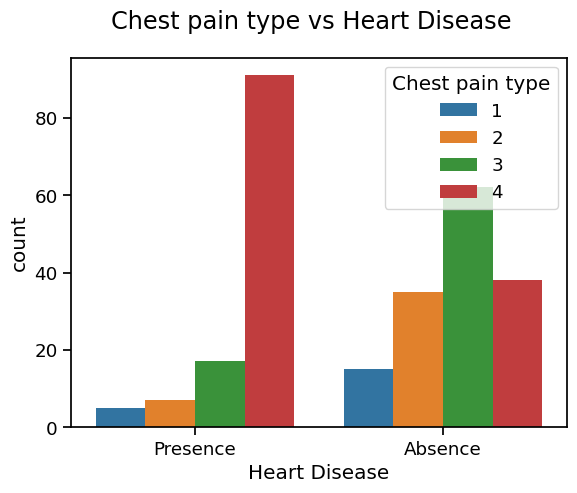

In [33]:
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Chest pain type')
plt.show()

C:\Users\91904\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


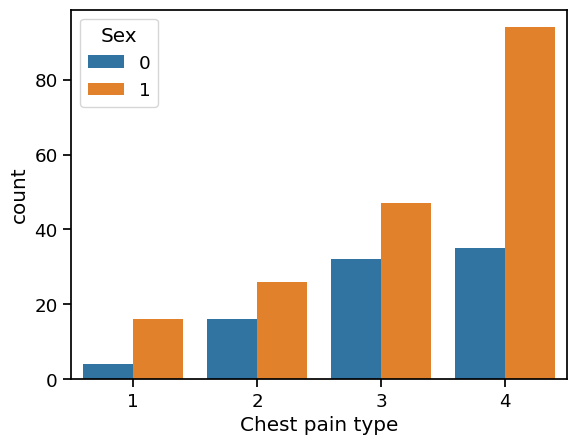

In [34]:
sns.countplot(data['Chest pain type'],hue=data["Sex"])
plt.show()

<!-- People having least chest pain are not likely to heart disease.
People having severe chest pain are likely to heart disease
*Heart Disease based on BP* - Persons with high BP have more chance to get heart disease -->

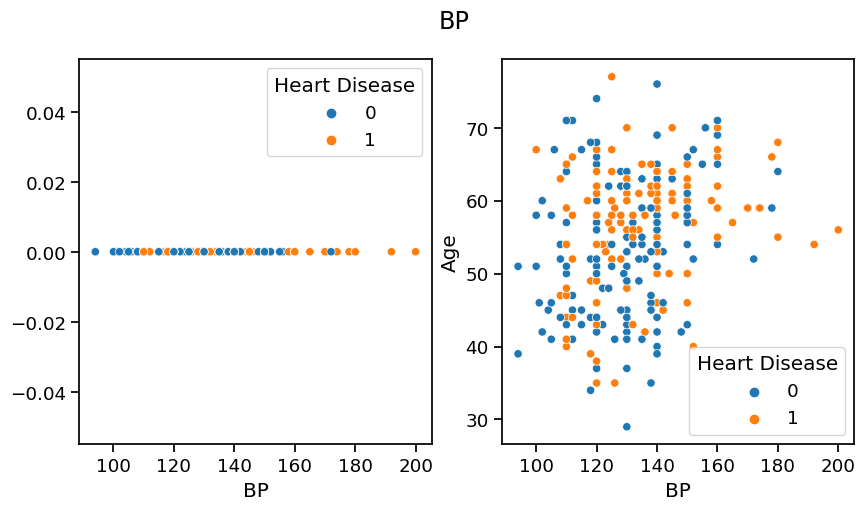

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("BP")
sns.scatterplot(data=df, x='BP', y=np.zeros(len(df['BP'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='BP', y='Age', hue=target)


plt.show()

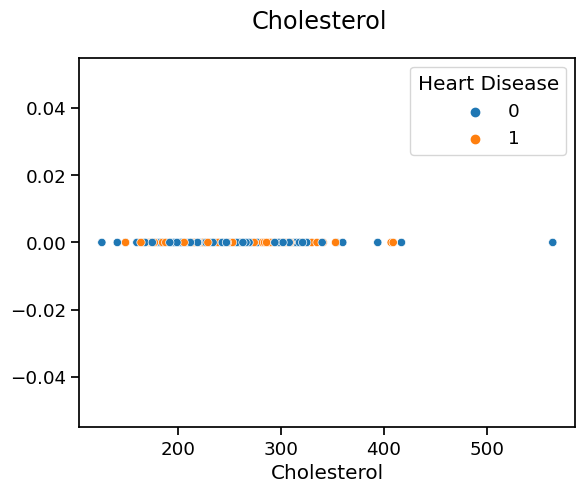

In [36]:
plt.suptitle("Cholesterol")
sns.scatterplot(data=df, x='Cholesterol', y=np.zeros(len(df['Cholesterol'])), hue=target)
plt.show()

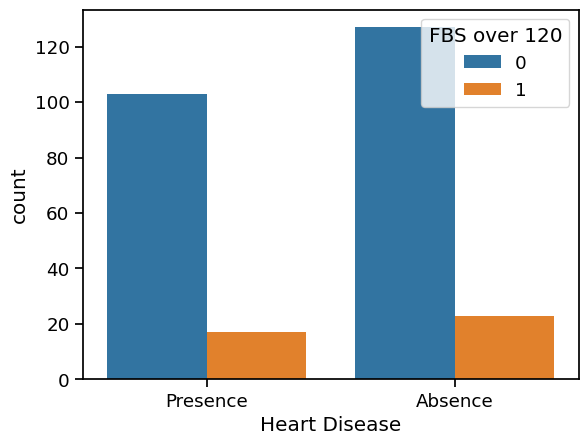

In [37]:
ax = sns.countplot(x='Heart Disease', hue='FBS over 120', data=df)
sns.set_context('notebook',font_scale = 0.5)
plt.show()

C:\Users\91904\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


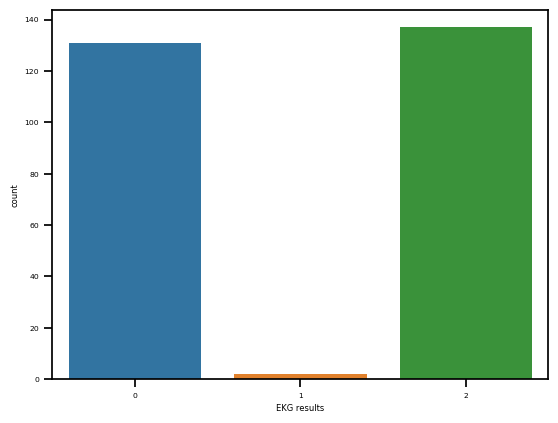

In [38]:
sns.countplot(data['EKG results'])
plt.show()

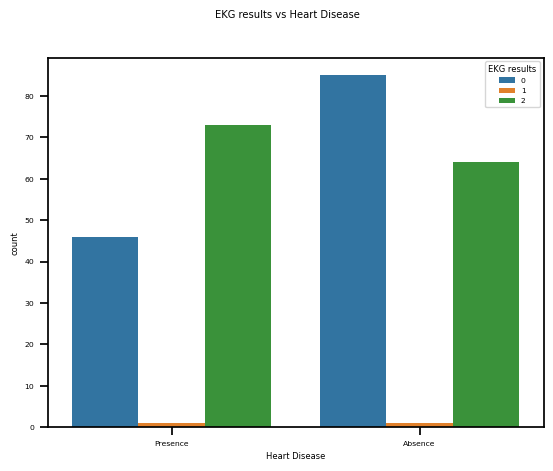

In [39]:
plt.suptitle('EKG results vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='EKG results')
plt.show()

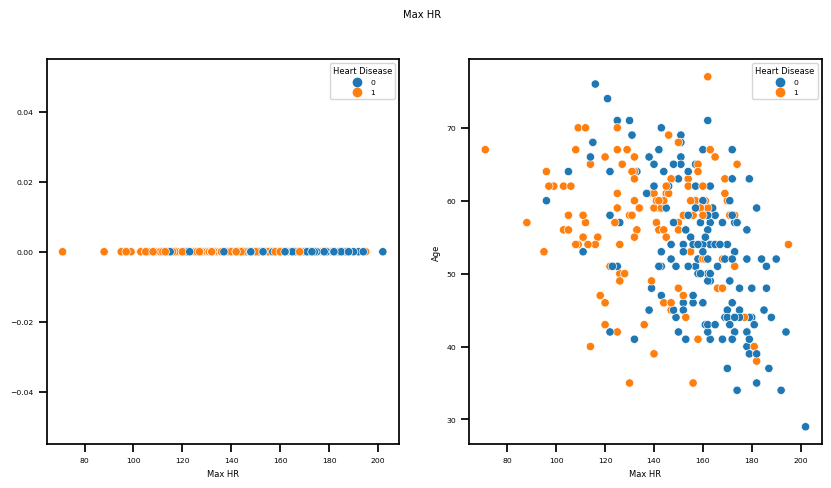

In [40]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("Max HR")
sns.scatterplot(data=df, x='Max HR', y=np.zeros(len(df['Max HR'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Max HR', y='Age', hue=target)

plt.show()

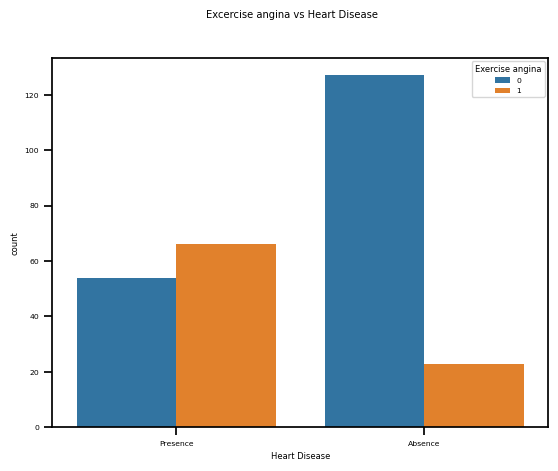

In [41]:
plt.suptitle('Excercise angina vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Exercise angina')
plt.show()

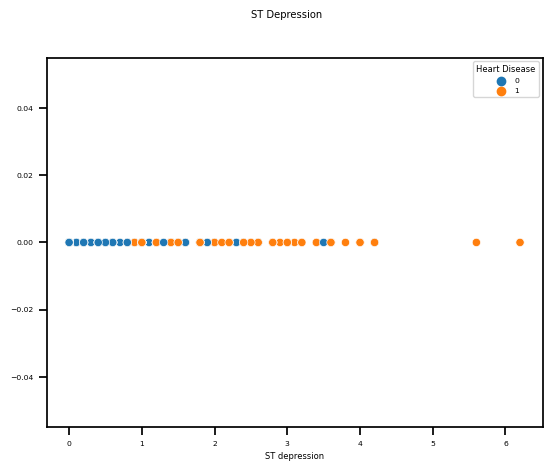

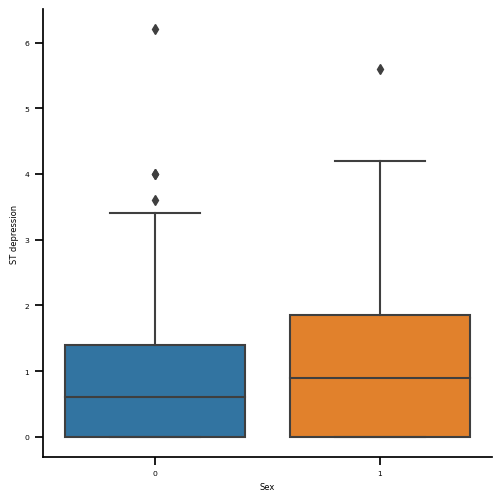

In [42]:
plt.suptitle("ST Depression")
sns.scatterplot(data=df, x='ST depression', y=np.zeros(len(df['ST depression'])), hue=target)


ax = sns.catplot(x='Sex', y='ST depression', kind='box',  data = df)
plt.show()

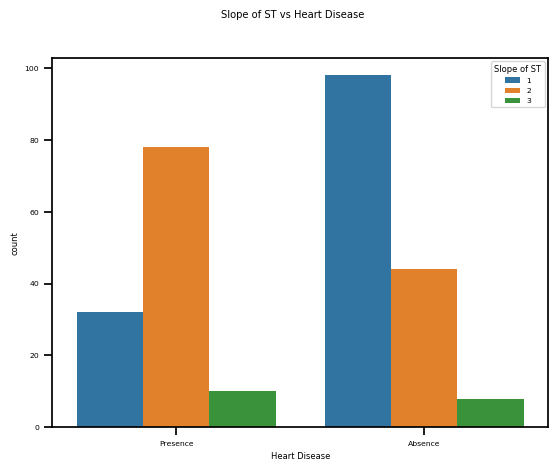

In [43]:
plt.suptitle('Slope of ST vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Slope of ST')
sns.set_context(font_scale = 1)
plt.show()

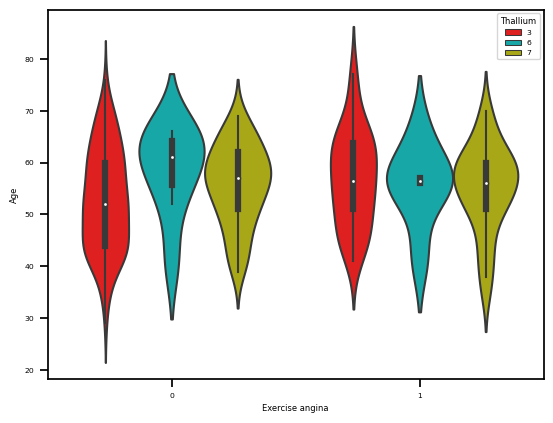

In [44]:
sns.violinplot(x="Exercise angina",y="Age",data=data,palette=["r", "c", "y"],hue="Thallium")
plt.show()

In [45]:
Chest_pain_type = pd.get_dummies(df['Chest pain type'], prefix='Chest pain type', drop_first=True)
EKG_results = pd.get_dummies(df['EKG results'], prefix='EKG results', drop_first=True)
Number_of_vessels_fluro = pd.get_dummies(df['Number of vessels fluro'], prefix='Number of vessels fluro', drop_first=True)
Thallium = pd.get_dummies(df['Thallium'], prefix='Thallium', drop_first=True)

frames = [df, Chest_pain_type, EKG_results, Number_of_vessels_fluro, Thallium]
df = pd.concat(frames, axis=1)

df.drop(columns = ['Chest pain type', 'EKG results', 'Number of vessels fluro', 'Thallium', 'Slope of ST'])

target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [46]:
one_target = int(np.sum(target))
zero_counter = 0
indices_to_remove = []

for i in range(target.shape[0]):
    if target[i] == 0:
        zero_counter += 1
    if zero_counter > one_target:
        indices_to_remove.append(i)

print("Indices before balancing data:", target.shape[0])
print("Idices to delete:", len(indices_to_remove))

Indices before balancing data: 270
Idices to delete: 54


In [47]:
balanced_inputs = inputs.drop(indices_to_remove, axis=0)
balanced_targets = target.drop(indices_to_remove, axis=0)

#reset indices
reset_inputs = balanced_inputs.reset_index(drop=True)
reset_targets = balanced_targets.reset_index(drop=True)

print("Inputs after balancing data:", reset_inputs.shape[0])
print("Targets after balancing data:", reset_targets.shape[0])

balanced_inputs.head()

Inputs after balancing data: 216
Targets after balancing data: 216


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,1,0,1,0,0,1,0,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,1,0,0,1,0,0,0,0,1
2,57,1,2,124,261,0,0,141,0,0.3,...,1,0,0,0,0,0,0,0,0,1
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,1,0,0,1,0,0,0,1
4,74,0,2,120,269,0,2,121,1,0.2,...,1,0,0,0,1,1,0,0,0,0
